In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage as ski

%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11


uint16


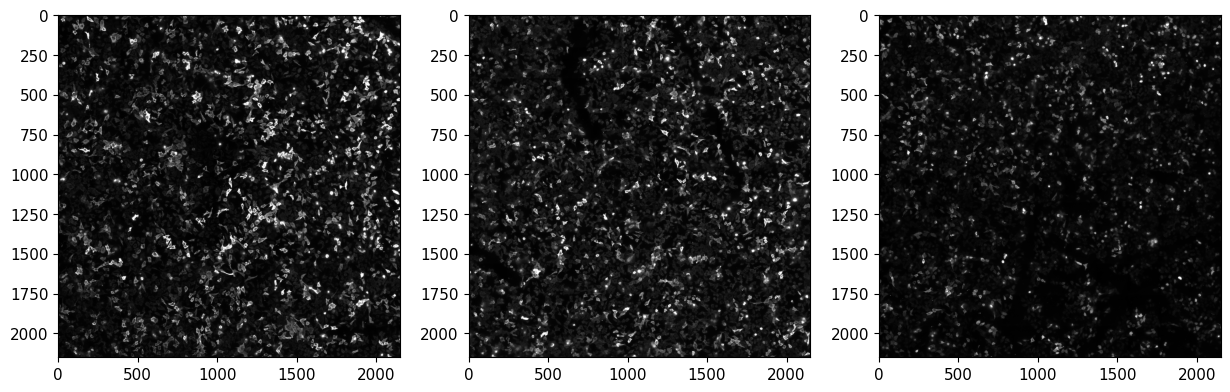

In [3]:
def plot_images(imgs, rescale = False):
    fig, axs = plt.subplots(1,len(imgs),
                            figsize = (len(imgs)*5,5))
    for i,ax in enumerate(axs):
        if not rescale:
            ax.imshow(imgs[i],
                    vmin = 0, vmax = 255,
                    cmap = "grey")
        else:
            ax.imshow(imgs[i],
                    cmap = "grey")
    return

img_x = ski.io.imread("E:\diploma_thesis\Data\X. Distribuion\FigureImg\X_AB.nd2 - C=0.tif")
img_tp = ski.io.imread("E:\diploma_thesis\Data\X. Distribuion\FigureImg\TP_AB.nd2 - C=0.tif")
img_fy = ski.io.imread("E:\diploma_thesis\Data\X. Distribuion\FigureImg\FY_AB.nd2 - C=0.tif")

print(img_x.dtype)

images = [ski.util.img_as_ubyte(img_x), 
          ski.util.img_as_ubyte(img_tp), 
          ski.util.img_as_ubyte(img_fy)]


plot_images(images,rescale = True)


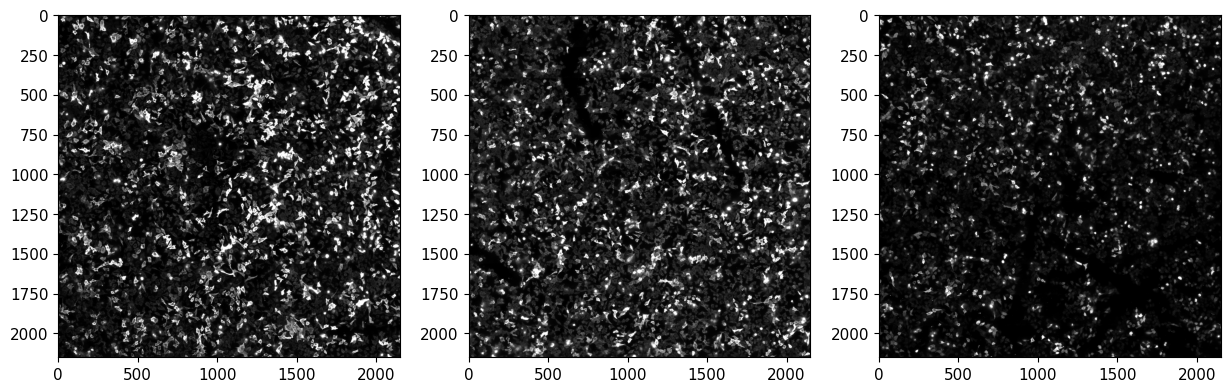

In [4]:
p2, p98 = np.percentile(np.stack(images), (2, 98))
rescaled_images = [ski.exposure.rescale_intensity(img, in_range=(p2, p98)) for img in images]
plot_images(rescaled_images,rescale = False)

[7.08 5.31]


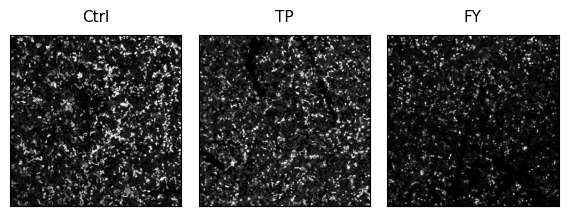

In [58]:
class image_figure:
    def __init__(self) -> None:
        self.df = pd.DataFrame()
        self.image_dic = {}
        pass
    
    def add_lane(self,
                 images,
                 y_label = "",
                 x_labels = None):
        if x_labels == None:
            x_labels = np.arange(len(images))
        for i,img in enumerate(images):
            id = len(self.image_dic.keys())
            self.image_dic[id] = img
            self.df.loc[y_label,x_labels[i]] = id
        return self
    
    def add_rgb_lane(self):
        return self
    
    def add_labels(self):
        return self
    
    def plot(self, width = 10):
        fig, axs = plt.subplots(*self.df.shape)
        for i, (y_lab, row) in enumerate(self.df.iterrows()):
            ax_row = axs
            if len(axs.shape) > 1:
                ax_row = axs[i]
            for j, (x_lab, item) in enumerate(row.items()):
                ax_row[j].imshow(self.image_dic[item],
                    vmin = 0, vmax = 255,
                    cmap = "grey")
                ax_row[j].tick_params(left = False,
                                   bottom = False,
                                   labelbottom = False,
                                   labelleft = False)
                if i == 0:
                    ax_row[j].tick_params(labeltop = True)
                    ax_row[j].set_xticks([np.mean(ax_row[j].get_xlim())],
                                             [x_lab])
                if j == 0:
                    ax_row[j].tick_params(labelleft = True)
                    ax_row[j].set_yticks([np.mean(ax_row[j].get_ylim())],
                                            [y_lab])
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=-0.15)
        w, h = fig.get_size_inches()
        scale = width/w
        fig.set_figwidth(w * scale)
        fig.set_figheight(h * scale)
        return fig
    

fig = image_figure().add_lane(rescaled_images,
                        x_labels= ["Ctrl", "TP", "FY"],
                        y_label= "").plot(width = 7.08)
                        
print(fig.get_size_inches())